In [37]:
# Initialize Otter
import otter
grader = otter.Notebook("final-project.ipynb")

# Final Project: Cardiovascular Disease: Causes, Treatment, and Prevention

DS 1 - Spring 2021

In this project, you will investigate the major causes of death in the world: cardiovascular disease! 

In [38]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import otter
grader = otter.Notebook()


In the following analysis, we will investigate the world's most dangerous killer: Cardiovascular Disease. Your investigation will take you across decades of medical research, and you'll look at multiple causes and effects across four different studies.

Here is a roadmap for this project:

* In Part 1, we'll investigate the major causes of death in the world during the past century (from 1900 to 2015).
* In Part 2, we'll look at data from the Framingham Heart Study, an observational study into cardiovascular health.
* In Part 3, we'll examine the effect that hormone replacement therapy has on the risk of coronary heart disease for post-menopausal women using data from the Nurses' Heart Study and Heart and Estrogen-Progestin Replacement Study.
* In Part 4, we'll explore the effect that the consumption of saturated fats has on cardiovascular death rates using data from the National Heart-Diet Study

## Part 1: Causes of Death 

In order to get a better idea of how we can most effectively prevent deaths, we need to first figure out what the major causes of death are. Run the following cell to read in and view the `causes_of_death` table, which documents the death rate for major causes of deaths over the last century (1900 until 2015).

In [39]:
causes_of_death = Table.read_table('data/causes_of_death.csv')
causes_of_death.show(5)

Year,Cause,Age Adjusted Death Rate
2015,Heart Disease,168.5
2015,Cancer,158.5
2015,Stroke,37.6
2015,Accidents,43.2
2015,Influenza and Pneumonia,15.2


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

If we look at unadjusted data, the age distributions of each sample will influence death rates. In an older population, we would expect death rates to be higher for all causes since old age is associated with higher risk of death. To compare death rates without worrying about differences in the demographics of our populations, we adjust the data for age.

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. 

You aren't responsible for knowing how to do this adjustment, but should understand why we adjust for age and what the consequences of working with unadjusted data would be. 

**Question 1:** What are all the different causes of death in this dataset? Assign an array of all the unique causes of death to `all_unique_causes`.



<!--
BEGIN QUESTION
points: 2
name: q1_1
manual: false
-->

In [40]:
all_unique_causes = causes_of_death.group('Cause').column('Cause')
sorted(all_unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

In [41]:
grader.check("q1_1")

q1_1 passed!

**Question 2:** We would like to plot the death rate for each disease over time. To do so, we must create a table with one column for each cause and one row for each year.

Create a table called `causes_for_plotting`. It should have one column called `Year`, and then a column with age-adjusted death rates for each of the causes you found in Question 1. There should be as many of these columns in `causes_for_plotting` as there are causes in Question 1.

*Hint*: Use [`pivot`](http://data8.org/datascience/_autosummary/datascience.tables.Table.pivot.html?highlight=aggregation), and think about how the `first` function might be useful in getting the **Age Adjusted Death Rate** for each cause and year combination.

<!--
BEGIN QUESTION
points: 1
name: q1_2
manual: false
-->

In [42]:
# This function may be useful for Question 2.
def first(x):
    return x.item(0)

In [43]:
causes_for_plotting = causes_of_death.pivot('Cause', 'Year', 'Age Adjusted Death Rate', first)
causes_for_plotting.show(5)

Year,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2


Let's take a look at how age-adjusted death rates have changed across different causes over time. Run the cell below to compare Heart Disease (a chronic disease) and Influenza and Pneumonia (infectious diseases).

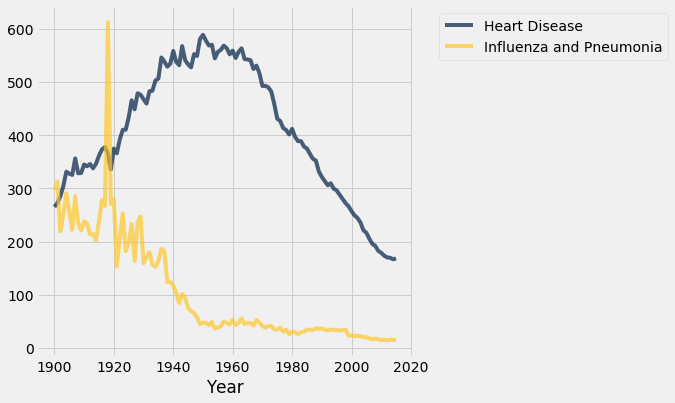

In [44]:
causes_for_plotting.select('Year', "Heart Disease", "Influenza and Pneumonia").plot('Year')

**Question 3:** Beginning in 1900 and continuing until 1950, we observe that death rates for Influenza and Pneumonia decrease while death rates for Heart Disease increase. What might have caused this shift?

Assign `disease_trend_explanation` to an array of integers that correspond to possible explanations for these trends.

1. People are living longer, allowing more time for chronic conditions to develop. 
2. A cure has not been discovered for influenza, so people are still dying at high rates from the flu.
3. Improvements in sanitation, hygiene, and nutrition have reduced the transmission of viruses and bacteria that cause infectious diseases.
4. People are more active, putting them at lower risk for conditions like heart disease and diabetes.
5. Widespread adoption of vaccinations has reduced rates of infectious disease.
6. The medical community has became more aware of chronic conditions, leading to more people being diagnosed with heart disease.

*Hint:* Consider what contributes to the development of these diseases. What decreases the transmission of infections? Why do we see more lifestyle-related conditions like heart disease?

<!--
BEGIN QUESTION
name: q1_3
points: 2
manual: false
-->

In [45]:
disease_trend_explanation = make_array(1,3,5,6)
disease_trend_explanation

array([1, 3, 5, 6])

In [46]:
grader.check("q1_3")

q1_3 passed!

This phenomenon is known as the epidemiological transition - in developed countries, the severity of infectious disease has decreased, but chronic disease has become more widespread. Coronary heart disease (CHD) is one of the most deadly chronic diseases that has emerged in the past century, and more healthcare resources have been invested to studying it.

Run the cell below to see what a plot of the data would have looked like had you been living in 1950. CHD was the leading cause of death and had killed millions of people without warning. It had become twice as lethal in just a few decades and people didn't understand why this was happening.

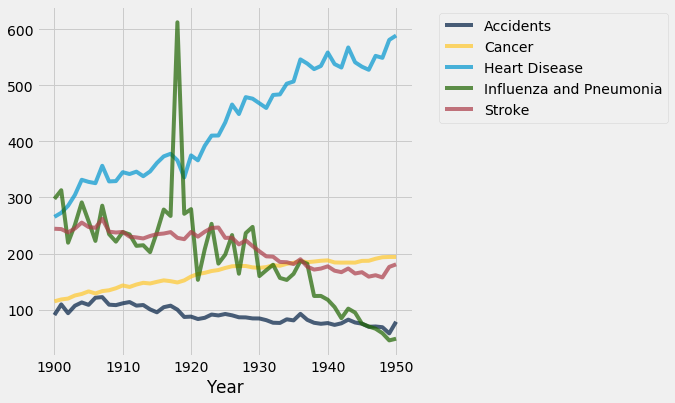

In [47]:
# Do not change this line
causes_for_plotting.where('Year', are.below_or_equal_to(1950)).plot('Year')

The view from 2016 looks a lot less scary, however, since we know it eventually went down. The decline in CHD deaths is one of the greatest public health triumphs of the last half century. That decline represents many millions of saved lives, and it was not inevitable. The Framingham Heart Study, in particular, was the first to discover the associations between heart disease and risk factors like smoking, high cholesterol, high blood pressure, obesity, and lack of exercise.

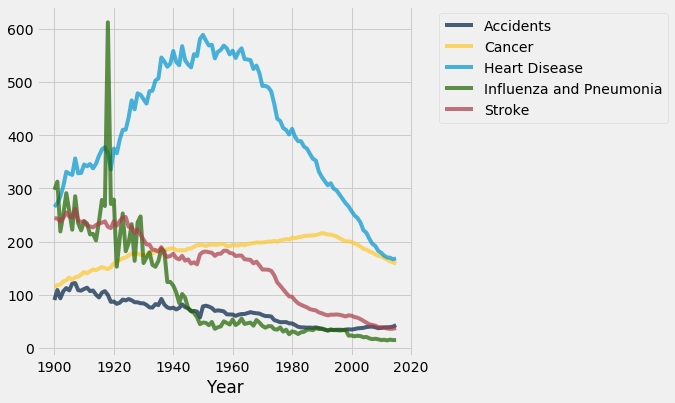

In [48]:
# Do not change this line
causes_for_plotting.plot('Year')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and diet on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease is still higher than the death rates of all other causes. Even though the death rate is starkly decreasing, there's still a lot we don't understand about the causes (both direct and indirect) of heart disease.

## Part 2: The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this section, we'll investigate some of the study's key findings about cholesterol and heart disease.

Run the cell below to examine data for 3842 subjects from the first wave of the study, collected in 1956.

In [49]:
framingham = Table.read_table('data/framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study - we are excluding subjects who already had heart disease or had missing data.

### Section 1: Diabetes and the Population

Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the percentage of the population who have it) in the U.S. around this time was 0.93%. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 1**: What is the observed value of the statistic in the data from the Framingham Study? You should convert prevalence values to proportions before calculating the statistic!

<!--
BEGIN QUESTION
name: q2_1_1
points: 2
manual: false
-->

In [50]:
observed_diabetes_distance = abs((len(framingham.where('DIABETES',1).column('DIABETES')))/framingham.num_rows - 0.0093)
observed_diabetes_distance

0.01802951587714732

In [51]:
grader.check("q2_1_1")

q2_1_1 passed!

**Question 2**: Define the function `diabetes_statistic` which should return exactly one simulated statistic of the absolute distance between the observed prevalence and the true population prevalence under the null hypothesis. Make sure that your simulated sample is the same size as your original sample.

*Hint:* The array `diabetes_proportions` contains the proportions of the population without and with diabetes, respectively.

<!--
BEGIN QUESTION
name: q2_1_2
points: 2
manual: false
-->

In [52]:
diabetes_proportions = make_array(.9907, .0093)

def diabetes_statistic():
    sample_proportions(framingham.num_rows, diabetes_proportions)
    return(observed_diabetes_distance - sample_proportions(framingham.num_rows,diabetes_proportions).item(1))

In [53]:
grader.check("q2_1_2")

q2_1_2 passed!

**Question 3**:  Complete the following code to simulate 5000 values of the statistic under the null hypothesis.

<!--
BEGIN QUESTION
name: q2_1_3
points: 1
manual: false
-->

In [54]:
diabetes_simulated_stats = make_array()

for i in np.arange(5000): 
    diabetes_simulated_stats = np.append(diabetes_simulated_stats,diabetes_statistic())

diabetes_simulated_stats

array([ 0.0099608 ,  0.01048136,  0.00735799, ...,  0.01100193,
        0.00891968,  0.01100193])

In [55]:
grader.check("q2_1_3")

q2_1_3 passed!

<!-- BEGIN QUESTION -->

**Question 4**: Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

*If you're not sure if your histogram is correct, think about how we're generating the sample statistics under the null, and what those statistics will look like*

*Make sure to run the cell that draws the histogram, since it will be graded.*

<!--
BEGIN QUESTION
name: q2_1_4
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

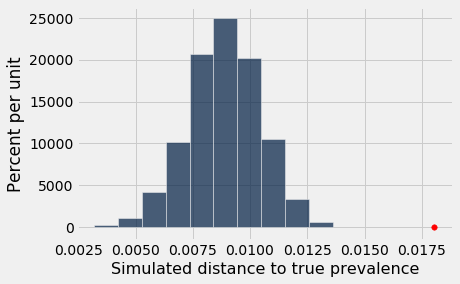

In [56]:
Table().with_column('Simulated distance to true prevalence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red', s=30);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5**: Based on the historgram above, should you reject the null hypothesis?

<!--
BEGIN QUESTION
name: q2_1_5
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

I would reject our null hypothesis because our observed value is far from the values presented in the historgram. Thus, making it unlikely that our null hypothesis is true.

<!-- END QUESTION -->

**Question 6**: Why might there be a difference between the population and the sample from the Framingham Study? Assuming that all these statements are true - what are possible explanations for the higher diabetes prevalence in the Framingham population?

Assign the name `framingham_diabetes_explanations` to an array of the following explanations that **are consistent** with the trends we observe in the data and our hypothesis test results. 

1. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed). By contrast, the Framingham participants were less likely to go undiagnosed because they had regular medical examinations as part of the study.
2. The relatively wealthy population in Framingham ate a luxurious diet high in sugar (high-sugar diets are a known cause of diabetes).
3. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.

<!--
BEGIN QUESTION
name: q2_1_6
points: 2
manual: false
-->

In [57]:
framingham_diabetes_explanations = make_array(1,2,3)
framingham_diabetes_explanations

array([1, 2, 3])

In [58]:
grader.check("q2_1_6")

q2_1_6 passed!

In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting more information from each person in the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Section 2: Cholesterol and Heart Disease

In the remainder of this question, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the distribution of cholesterol levels among those who get heart disease is the same as the distribution of cholesterol levels
among those who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who get
heart disease are higher, on average, than the cholesterol level of people who do not.

**Question 1:** From the provided Null and Alternative Hypotheses, does it seem reasonable to use A/B Testing to determine which model is more consistent? Assign the variable `ab_reasonable` to `True` if it seems reasonable and `False` otherwise.

<!--
BEGIN QUESTION
name: q2_2_1
points: 2
manual: false
-->

In [59]:
ab_reasonable = True
ab_reasonable

True

In [60]:
grader.check("q2_2_1")

q2_2_1 passed!

<!-- BEGIN QUESTION -->

**Question 2:** Now that we have a null hypothesis, we need a test statistic. Explain and justify your choice of test statistic in two sentences or less.

*Hint*: Remember that larger values of the test statistic should favor the alternative over the null.

<!--
BEGIN QUESTION
name: q2_2_2
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

Look for the abs. differnce between the mean of cholesteral levels in the normal group and the
mean of cholesteral levels in the diabetes group after grouping. This will tell us if there is
an actual difference between the two groups and prove or disporve the null.

<!-- END QUESTION -->

**Question 3**: Write a function that computes your test statistic. It should take a table with two columns, `TOTCHOL` (total serum cholesterol) and `ANYCHD` (whether or not the person had coronary heart disease), and compute the test statistic you described above. 

Use the function you defined to compute the observed test statistic, and assign it to the name `framingham_observed_statistic`.

<!--
BEGIN QUESTION
name: q2_2_3
points: 3
manual: false
-->

In [61]:
def compute_framingham_test_statistic(tbl):
    difference = np.average(tbl.where('ANYCHD',1).column('TOTCHOL'))-np.average(tbl.where('ANYCHD', 0).column('TOTCHOL'))
    return difference

framingham_observed_statistic = compute_framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

In [62]:
grader.check("q2_2_3")

q2_2_3 passed!

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

**Question 4**: Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 1000 times) and return the value of the test statistic for that simulated sample.

<!--
BEGIN QUESTION
name: q2_2_4
points: 2
manual: false
-->

In [63]:
def simulate_framingham_null():
    stimulate_sample = framingham.sample(with_replacement = False)
    
    replace_old = framingham.drop('ANYCHD').with_column('ANYCHD', stimulate_sample.column('ANYCHD'))
    replace_old = framingham.drop('TOTCHOL').with_column('TOTCHOL', stimulate_sample.column('TOTCHOL'))
    return compute_framingham_test_statistic(replace_old)
    
# Run your function once to make sure that it works.
simulate_framingham_null()

5.4982207878186102

In [64]:
grader.check("q2_2_4")

q2_2_4 passed!

**Question 5**: Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 100 values of the test statistic under the null hypothesis and store the result in the array `framingham_simulated_stats`.

*Hint*: You should use the function you wrote above in Question 4.

*Note*: Warning: running should only take a couple minutes at max!  We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

<!--
BEGIN QUESTION
name: q2_2_5
points: 1
manual: false
-->

In [65]:
framingham_simulated_stats = make_array()

for i in np.arange(100):
    framingham_simulated_stats = np.append(framingham_simulated_stats, simulate_framingham_null())

In [66]:
grader.check("q2_2_5")

q2_2_5 passed!

<!-- BEGIN QUESTION -->

**Question 6:** The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

<!--
BEGIN QUESTION
name: q2_2_6
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

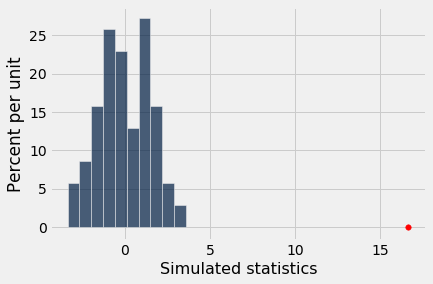

In [67]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.scatter(framingham_observed_statistic, 0, color='red', s=30);

<!-- END QUESTION -->

**Question 7**: Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_value`.

*Hint*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.

<!--
BEGIN QUESTION
name: q2_2_7
points: 1
manual: false
-->

In [68]:
framingham_p_value = sum(framingham_simulated_stats >= framingham_observed_statistic)/(len(framingham_simulated_stats))
framingham_p_value

0.0

In [69]:
grader.check("q2_2_7")

q2_2_7 passed!

<!-- BEGIN QUESTION -->

**Question 8**: Despite the Framingham Heart Study's well-deserved reputation as a well-conducted and rigorous study, it has some major limitations. Give one specific reason why it can't be used to say that high cholesterol *causes* heart disease.

<!--
BEGIN QUESTION
name: q2_2_9
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

High cholesterol can caused bad health which can be related to the cause of heart disease. Study is observational and is not randomly controlled. Thus, we are unable to identify confounding factors and high cholesterol may have an indirect causation but it may not actually be the cause.

Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

*"Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."*

## Checkpoint 1 (Due 06/02)
#### Congratulations, you have reached the first checkpoint! Run the submit cell below to generate the checkpoint submission.
To get full credit for this checkpoint, you must pass all the public autograder tests above this cell.

<!-- END QUESTION -->



## Part 3: Hormone Replacement Therapy for Cardiovascular Health

### Section 1: The Nurses' Health Study

The Nurses' Health Study (NHS) is another very large observational study which has brought many insights into women's health. It began in 1976 by Dr. Frank Speizer, with questionnaires that were mailed to 121,964 female registered nurses in the United States asking about their medical history, cholesterol and blood pressure, current medications, and so on (one of the benefits of studying nurses is their ability to give reliably accurate answers to these questions). 

The study's initial focus was on investigating the long-term health effects of oral contraceptives, whose use had become much more widespread in the U.S. during the 1960s, but the focus soon expanded to investigating a wide variety of questions on women's health. The NHS continues to this day, tracking its third generation of nurses in the US.

**One of the most consequential early findings from the NHS was about hormone replacement therapy (HRT)**: supplementary estrogen and progesterone for post-menopausal women to relieve side effects of declining hormone levels due to menopause. The NHS found that HRT in postmenopausal women was negatively associated with heart attack risk. In a landmark 1985 paper in the *New England Journal of Medicine* (NEJM), Speizer and his coauthors wrote that
> As compared with the risk in women who had never used postmenopausal hormones, the age-adjusted relative risk of coronary disease in those who had ever used them was 0.5 (95 per cent confidence limits, 0.3 and 0.8; P = 0.007)... These data support the hypothesis that the postmenopausal use of estrogen reduces the risk of severe coronary heart disease. [(Stampfer et al., 1985)](https://www.ncbi.nlm.nih.gov/pubmed/4047106)

**In other words, the authors are saying that women on HRT are half as likely to suffer a heart attack over a certain time period.** We'll define the term "relative risk" later in this section, and we'll also investigate the interpretation of these claims and their statistical basis.

**Question 1** Based on the passage above, which of the following statements can you infer about the Nurses' Health Study? Create an array called `nhs_true_statements` and add integers corresponding to statements you believe are correct (ex: write `nhs_true_statements = make_array(1, 2, 4)` if you think options 1, 2, and 4 are correct)

1. The Nurses' Health Study was a controlled experiment with a control and treatment group.
2. Hormone replacement therapy is most commonly used by young women.
3. The study uses data that was self-reported by nurses for the analysis
4. Since only nurses were included in the study, there's a chance that confounding factors influence our dataset.
5. The study found that estrogen and progesterone use had an association with CHD rates in post-menopausal women.

<!--
BEGIN QUESTION
points: 1
name: q3_1_1
manual: false
-->

In [70]:
nhs_true_statements = make_array(3,4,5)
nhs_true_statements

array([3, 4, 5])

In [71]:
grader.check("q3_1_1")

q3_1_1 passed!

**The scientists running the NHS wanted to compare post-menopausal women who had taken HRT with post-menopausal women who had never taken HRT, excluding all women who were not post-menopausal or who had previously suffered a heart attack.** This study design complicates the analysis because it creates a variety of reasons why women might drop in and out of the relevant comparison groups.

**Question 2.** Consider the following events which could occur in the middle of the study period (read the above paragraph carefully first): 
0. A woman (who has never had a heart attack) was pre-menopausal at the beginning of the study period becomes post-menopausal in the middle of the study period.
1. A post-menopausal woman survives a heart attack in the middle of the study period (assume the woman is post-menopausal and had never before had a heart attack).
2. A woman dies of cancer in the middle of the study period (assume the woman is post-menopausal and has never had a heart attack).
3. A woman who was not on HRT at the beginning of the study period, and had never before taken HRT, begins taking HRT in the middle of the period (assume the woman is post-menopausal and has never had a heart attack).
4. A woman who was taking HRT at the beginning of the study period stops taking HRT in the middle of the period (assume the woman is post-menopausal and has never had a heart attack).

For each of the events listed above, answer whether they would result in a woman

- (`E`) entering the study in the middle, 
- (`L`) leaving the study in the middle, 
- (`S`) switching from one comparison group to another in the middle, or 
- (`N`) none of the above 


<!--
BEGIN QUESTION
points: 1
name: q3_1_2
manual: false
-->

Assign `event_result` to an array of strings where the *i*th string is a single *capital* letter corresponding to your answer for the *i*th event.

For example, an example answer is `event_result = make_array('N', 'E', 'E', 'L', 'E')` where our answer for event 0 is `N`, our answer for event 1 is `E`, our answer for event 2 is `E`, etc.

In [72]:
event_result = make_array("E", "L", "L", "S", "N")
event_result

array(['E', 'L', 'L', 'S', 'N'],
      dtype='<U1')

In [73]:
grader.check("q3_1_2")

q3_1_2 passed!

Because women could (and did) drop into and out of the comparison groups in the middle of the study, it is difficult to make a table like we usually would, with one row per participant. In medical studies, individuals are typically weighted by the *amount of time* that they enrolled in the study. A more convenient sampling unit is a **person-month at risk**, which is one month spent by a particular woman in one of the comparison groups, during which she might or might not suffer a heart attack. Here, "at risk" just means the woman is being tracked by the survey in either of the two comparison groups, so that if she had a heart attack it would be counted in our data set.

**Example**: The table below tracks the histories of two hypothetical post-menopausal women in a six-month longitudinal study, who both enter the study in January 1978:
1. Alice has never been on HRT. She has a heart attack in March and is excluded for the remainder of the study period. 
2. Beatrice begins taking HRT for the first time in April and stays healthy throughout the study period.

| Name     | Month    | HRT | Heart Attack   |                                             
|----------|----------|-----|----------------|
| Alice    | Jan 1978 |  0  | 0              |
| Alice    | Feb 1978 |  0  | 0              |
| Alice    | Mar 1978 |  0  | 1              |
| Beatrice | Jan 1978 |  0  | 0              | 
| Beatrice | Feb 1978 |  0  | 0              |
| Beatrice | Mar 1978 |  0  | 0              |
| Beatrice | Apr 1978 |  1  | 0              |
| Beatrice | May 1978 |  1  | 0              |
| Beatrice | Jun 1978 |  1  | 0              |



The probability that a heart attack will happen to a given at-risk person in a given duration of time is called the **hazard rate**. The NHS calculated its effects in terms of the **relative risk**, which is simply the hazard rate for *person-months* in the HRT (Group A) group divided by the hazard rate in the no-HRT (Group B) group.

$$\text{Relative Risk} = \frac{\text{Hazard Rate(Treatment Group)}}{\text{Hazard Rate(Control Group)}}$$


**Question 3.** Complete the following statements, by setting the variable names to the value that correctly fills in the blank.

If the hazard rate of the treatment group is greater than the hazard rate of the control group, the relative risk will be `blank1_1` one. This means that individuals in the treatment group are at `blank1_2` risk of having an heart attack compared to those in the control group.

If the hazard rate of the treatment group is less than the hazard rate of the control group, the relative risk will be `blank2_1` one. This means that individuals in the treatment group are at `blank2_2` risk of having an heart attack compared to those in the control group.

If the hazard rate of the treatment group is equal to the hazard rate of the control group, the relative risk will be `blank3_1` one. This means that individuals in the treatment group are at `blank3_2` risk of having an heart attack compared to those in the control group.

`blank1_1`, `blank2_1`, `blank3_1` should be set to one of the following strings: "less than", "equal to", or "greater than"

`blank1_2`, `blank2_2`, `blank3_2` should be set to one of the following strings:"lower", "equal", or "higher" 

<!--
BEGIN QUESTION
points: 1
name: q3_1_3
manual: false
-->

In [74]:
blank1_1 = 'greater than'
blank1_2 = 'higher'
blank2_1 = 'less than'
blank2_2 = 'lower'
blank3_1 = 'equal to'
blank3_2 = 'equal'

In [75]:
grader.check("q3_1_3")

q3_1_3 passed!

Most statistical methods that deal with this type of data assume that we can treat a table like the one above as though it is a sample of independent random draws from a much larger population of person-months at risk in each group. **We will take this assumption for granted throughout the rest of this section.**

Instead of *person-months* at risk, the NHS used *person-years* at risk. It reported 51,478 total person-years at risk in the no-HRT group with 60 heart attacks occurring in total, as well as 54,309 person-years at risk in the HRT group with 30 heart attacks occurring in total. The table NHS below has one row for each person-year at risk. The two columns are 'HRT', recording whether it came from the HRT group (1) or no-HRT group (0), and 'Heart Attack', recording whether the participant had a heart attack that year (1 for yes, 0 for no).

In [76]:
NHS = Table.read_table('data/NHS.csv')
NHS.show(3)

HRT,Heart Attack
0,0
0,0
0,0


Using the NHS data, we can now conduct a hypothesis test to investigate the relationship between HRT and risk of CHD. We'll set up the test as follows:

> **Null Hypothesis:** HRT does not affect the risk of CHD, and the true relative risk is equal to 1. Any deviation is due to random chance

> **Alternative Hypothesis:** HRT decreases the risk of CHD, and the true relative risk is less than 1.

> **Test Statistic:** Relative risk of CHD between post-menopausal women receiving HRT and post-menopausal women not receiving HRT (the definition of relative risk is repeated here for your convenience):

$$\text{Relative Risk} = \frac{\text{Hazard Rate(Treatment Group)}}{\text{Hazard Rate(Control Group)}}$$

*Note: Remember that we assume, under the null, that the two populations are derived from the same much larger population - under this assumption $\text{Hazard Rate(Treatment Group)} = \text{Hazard Rate(Control Group)}$. After simulation, we test this hypothesis by viewing the relative_risk for our simulated samples.*

**Question 4.** Fill in the missing code below to write a function called `relative_risk` that takes in a table with the column labels `HRT` and `Heart Attack`, and computes the sample relative risk as an estimate of the population relative risk. Do *not* round your answer.

<!--
BEGIN QUESTION
points: 1
name: q3_1_4
manual: false
-->

In [77]:
def relative_risk(tbl):
    """Return the ratio of the hazard rates (events per person-year) for the two groups"""
    Treatment = (tbl.where('HRT', 1).where('Heart Attack', 1).num_rows / tbl.where('HRT', 1).num_rows)
    Control = (tbl.where('HRT', 0).where('Heart Attack', 1).num_rows / tbl.where('HRT', 0).num_rows)
    return  Treatment / Control 

relative_risk(NHS)

0.47393618000699694

In [78]:
grader.check("q3_1_4")

q3_1_4 passed!

**Question 5.** Fill in the function `one_bootstrap_rr` so that it generates one bootstrap sample and computes the relative risk. Assign `bootstrap_rrs` to 10 (yes, only 10; the code is slow!) estimates of the population relative risk.

*Note:* The cell may take a few seconds to run.


<!--
BEGIN QUESTION
points: 2
name: q3_1_5
manual: false
-->

In [79]:
def one_bootstrap_rr():
    return relative_risk(NHS.sample())
bootstrap_rrs = make_array()
for i in np.arange(10):
    new_bootstrap_rr = one_bootstrap_rr()
    bootstrap_rrs = np.append(bootstrap_rrs, new_bootstrap_rr)

In [80]:
grader.check("q3_1_5")

q3_1_5 passed!

**Question 6.** The file `bootstrap_rrs.csv` contains a one-column table with 2001 saved bootstrapped relative risks. Use these bootstrapped values to compute a 95% confidence interval, storing the left endpoint as `ci_left` and the right endpoint as `ci_right`. 

Note that our method isn't exactly the same as the method employed by the study authors to get their confidence interval.


<!--
BEGIN QUESTION
points: 2
name: q3_1_6
manual: false
-->

In [81]:
bootstrap_rrs_from_tbl = Table.read_table('data/bootstrap_rrs.csv').column(0)
ci_left = percentile(2.5, bootstrap_rrs_from_tbl)
ci_right = percentile(97.5, bootstrap_rrs_from_tbl)

print("Middle 95% of bootstrappped relative risks: [{:f}, {:f}]".format(ci_left, ci_right))

Middle 95% of bootstrappped relative risks: [0.295930, 0.730383]


In [82]:
grader.check("q3_1_6")

q3_1_6 passed!

The code below plots the confidence interval on top of the bootstrap histogram.

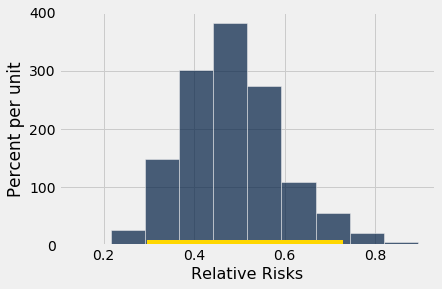

In [83]:
# Just run this cell
Table().with_column("Relative Risks", bootstrap_rrs_from_tbl).hist()
plots.plot([ci_left, ci_right], [.05,.05], color="gold");

**Question 7.** The abstract of the original paper gives a 95% confidence interval of [0.3, 0.8] for the relative risk. Which of the following statements can be justified based on that confidence interval? 

1. There is a 95% chance the relative risk is between 0.3 and 0.8.
2. If we used a P-value cutoff of 5%, we would reject the null hypothesis that HRT does not affect the risk of CHD.
3. If we redo the procedure that generated the interval [0.3, 0.8] on a fresh sample of the same size, there is a 95% chance it will include the true relative risk.
4. There is between a 30% and 80% chance that any woman will suffer a heart attack during the study period.


Assign ci_statements to an array of integer(s) corresponding to the correct answer(s).


<!--
BEGIN QUESTION
points: 1
name: q3_1_7
manual: false
-->

In [84]:
ci_statements = make_array(2,3)

In [85]:
grader.check("q3_1_7")

q3_1_7 passed!

<!-- BEGIN QUESTION -->

**Question 8.** What can you conclude from this test? Was hormone replacement therapy associated with an increased or decreased risk of heart attacks? Can we say that HRT caused an change in the risk of heart attacks? Explain your reasoning in 2-4 sentences. 

<!--
BEGIN QUESTION
name: q3_1_8
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

At the 5% significance level or 95% confidence interval, the hypothesis testing showed that the true relative risk falls outside the 95% confidence interval of 0.3 to 0.8. It only means that that the null hypothesis should be rejected and the alternative hypothesis should be accepted. We conclude that hormone replacement therapy is associated with a decreased risk of heart rate. It also caused a change in the risk of heart rate since it decreases the risk of CHD

Partly as a result of evidence from the NHS and other observational studies that drew similar conclusions, HRT drugs became a very popular preventive treatment for doctors to prescribe to post-menopausal woman. Even though there were known or suspected risks to the treatment (such as increasing the risk of invasive breast cancer), it was thought that the reduction in heart disease risk was well worth it.

### Section 2: The Heart and Estrogen-Progestin Replacement Study

The Heart and Estrogen-Progestin Replacement Study (HERS) was a large randomized controlled trial carried out by the Women's Health Initiative, which sought to verify whether HRT drugs were as effective as the observational studies seemed to suggest. 2,763 women with a history of heart disease were selected and randomly assigned to receive the treatment (daily estrogen pills) or a placebo pill that looked identical to the treatment. Of the 2763 women participating, 1380 were assigned to the treatment condition and 1383 to the control. They were followed for an average of three years and the number of heart attacks in the two groups was compared.

The main results table from the HERS study [Hulley et al. (1998)](https://jamanetwork.com/journals/jama/fullarticle/187879) is reproduced here:

<img src="data/HERS-table.png" width=500>

For this study, constructed our own table from scratch based on the results given above. The results are contained in the table `HERS` that has one row for each woman in the trial and two columns: `HRT`, which is 1 if she was assigned to treatment and 0 otherwise, and `CHD`, which is 1 if she suffered a Primary CHD (Coronary Heart Disease) event and 0 otherwise.

Run the cell below to view the results from the HERS study.

In [86]:
num_control = 1383 
num_treatment = 1380

num_control_chd = 176
num_treatment_chd = 172

hrt = np.append(np.zeros(num_control), np.ones(num_treatment))
chd_control = np.append(np.zeros(num_control - num_control_chd), np.ones(num_control_chd))
chd_treatment = np.append(np.zeros(num_treatment - num_treatment_chd), np.ones(num_treatment_chd))
chd = np.append(chd_control, chd_treatment)

HERS = Table().with_columns('HRT', hrt, 'CHD', chd)
HERS.show(3)

HRT,CHD
0,0
0,0
0,0


<!-- END QUESTION -->

**Question 1.** We would like to test the null hypothesis that the treatment (HRT) has no effect on the outcome (CHD), against the alternative hypothesis that the treatment does have an effect. What would be a good test statistic? 

Assign `good_ts` to an array of number(s) corresponding to the correct answer(s). Keep in mind that this was the first clinical trial to be done on this subject; as a result, it was not clear at the time whether any effect would be positive or negative.


1. The absolute difference between 1 and the relative risk.
2. The average CHD rate for the treatment group.
3. 10 times the absolute difference between the control and treatment groups' average CHD rates.

<!--
BEGIN QUESTION
points: 1
name: q3_2_1
manual: false
-->

In [87]:
good_ts = make_array(1,3)

In [88]:
grader.check("q3_2_1")

q3_2_1 passed!

**Question 2.** We'll use distance (absolute difference) between average CHD rates as our test statistic. 

Write a function called `hers_test_statistic` to calculate this test statistic on a table with columns `HRT` and `CHD`. Use this function to calculate the observed test statistic, and assign it to `observed_HERS_test_statistic`.

Think about what values of the test statistic support the null versus the alternative hypothesis. You'll use this information to compute the p-value later in this section.

<!--
BEGIN QUESTION
points: 2
name: q3_2_2
manual: false
-->

Null Hypothesis: HRT does not affect the risk of CHD, and the true relative risk is equal to 1. Any deviation is due to random chance

Alternative Hypothesis: HRT decreases the risk of CHD, and the true relative risk is less than 1.

Test Statistic: Relative risk of CHD between post-menopausal women receiving HRT and post-menopausal women not receiving HRT (the definition of relative risk is repeated here for your convenience):

In [89]:
def HERS_test_statistic(tbl):
    """Test statistic: Distance between the average responses"""
    average_hrt = np.mean(tbl.where("HRT", 1).column("CHD"))
    average_no_hrt = np.mean(tbl.where("HRT", 0).column("CHD"))
    averages = abs(average_hrt - average_no_hrt)
    return averages
observed_HERS_test_statistic = HERS_test_statistic(HERS)
observed_HERS_test_statistic

0.0026218994624162967

In [90]:
grader.check("q3_2_2")

q3_2_2 passed!

**Question 3.** Write a function called `simulate_one_HERS_statistic` to simulate one value of the test statistic under the null hypothesis. Make sure you're shufflling the labels `HRT`.

Then, use the function to repeatedly sample the null hypothesis 1000 times and compute the test statistic each time. The cell may take a few seconds to run.

<!--
BEGIN QUESTION
points: 3
name: q3_2_3
manual: false
-->

In [91]:
def simulate_one_HERS_statistic():
    stimulate_sample = HERS.sample(with_replacement=False).column("HRT")
    replace_old = HERS.drop("HRT").with_columns("HRT", stimulate_sample)
    simulate_HERS_stat = HERS_test_statistic(replace_old)
    return simulate_HERS_stat

HERS_test_statistics = make_array()
for i in np.arange(1000):
    new_HERS_statistic = simulate_one_HERS_statistic()
    HERS_test_statistics = np.append(HERS_test_statistics, new_HERS_statistic)

In [92]:
grader.check("q3_2_3")

q3_2_3 passed!

The code below generates a histogram of the simulated test statistics along with your test statistic:

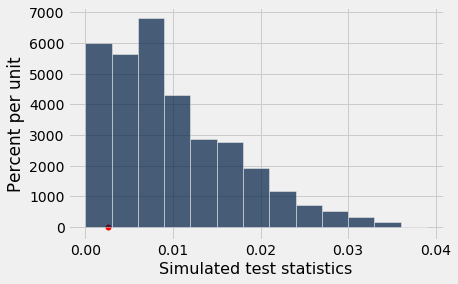

In [93]:
Table().with_column('Simulated test statistics', HERS_test_statistics).hist(bins=np.arange(0,.04,.003))
plots.scatter(HERS_test_statistic(HERS), 0, color='red', s=30);

**Question 4.** Compute the P-value for your hypothesis test and assign it to `HERS_pval`. 

<!--
BEGIN QUESTION
points: 2
name: q3_2_4
manual: false
-->

In [94]:
HERS_pval = sum(HERS_test_statistics >= observed_HERS_test_statistic)/ len(HERS_test_statistics)
HERS_pval

0.86099999999999999

In [95]:
grader.check("q3_2_4")

q3_2_4 passed!

In part 3, we gave you 2001 bootstrapped relative risks. In the context of the HERS trial, relative risk is now defined as the ratio of the probability that a given woman in the treatment group will have CHD over the study period divided by the probability that a given woman in the control group will have CHD over the study period.

We plot the histogram of bootstrapped relative risks, along with a confidence interval representing the middle 95% of that histogram:
<img src="data/bootstrap-HERS.png" width=400>

<!-- BEGIN QUESTION -->

**Question 5.** Based on the results for this experiment using HERS data, can we reject our null hypothesis that HRT has no effect on CHD risk? Explain why or why not using both the p-value and 95% confidence interval.

*Hint*: If you're not sure how to interpret relative risks, go back to Question 3 of Nurses' Health Study section.


<!--
BEGIN QUESTION
points: 1
name: q3_2_5
manual: true
-->
<!-- EXPORT TO PDF -->

I would not reject our null hypothesis because we have a relatively high p-value and majoraity of the histogram lies right near the middle 95%.

<!-- END QUESTION -->



The Heart and Estrogen-Progestin Replacement Study found that HRT did not have a significant impact on a woman's risk of CHD. These findings contradicted the results of the Nurses' Heart study, challenging the efficacy of a treatment that had become the standard of care for heart disease prevention. 

The HERS study authors put forward a possible answer regarding why the NHS study might be biased:
> However, the observed association between estrogen therapy and reduced CHD risk might be attributable to selection bias if women who choose to take hormones are healthier and have a more favorable CHD profile than those who do not. Observational studies cannot resolve this uncertainty.

**Selection bias** occurs in observational studies when there is a systematic difference between participants that receive a treatment and participants that do not receive a treatment. When this type of bias is present, the observed treatment effect might be a result of an unmeasured confounding variable.

**Question 6:** If women who choose to take hormones are healthier to begin with than women who choose not to, why might that systematically bias the results of observational studies like the NHS? Would we expect observational studies to overestimate or underestimate the protective effect of HRT?


<!--
BEGIN QUESTION
points: 1
name: q3_2_6
manual: false
-->
<!-- EXPORT TO PDF -->

There is a sysmtematic biases because we would expect those taking HRT are generally more
healthy and at less risk of heart diseases.Thus, we would not see a true impact of HRT on
CHD and the study would overestimate the protective effect of HRT.

### Further reading

If you're interested in learning more, you can check out these articles:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)
* [NYT article on the Nurses' Health Study and the HERS study](https://www.nytimes.com/2003/04/22/science/hormone-studies-what-went-wrong.html)

## Part 4: Diet and Cardiovascular Disease

To establish a causal link between saturated fat intake, serum cholesterol, and heart disease, a group of doctors in the US established the National Heart-Diet Study. The study was based in 6 centers: Baltimore, Boston, Chicago, Minneapolis-St. Paul, Oakland, and Faribault, MN. The first 5 centers recruited volunteers from the local population: volunteers and their families were asked to adjust their diet to include more or less saturated fat.

You may already have a strong intuition about what the doctors concluded in their findings, but the evidence from the trial was surprisingly complex.

The sixth center was organized by Dr. Ivan Frantz, and its study was known as the Minnesota Coronary Experiment. Dr. Frantz was a strong proponent of reducing saturated fats to prevent death from heart disease. He believed so strongly in the idea that he placed his household on a strict diet very low in saturated fats. The main difference between the Minnesota Coronary Experiment and the rest of the National Diet-Heart Study was the setting. While the other centers in the study looked at volunteers, Dr. Frantz conducted his study at Faribault State Hospital, which housed patients who were institutionalized due to disabilities or mental illness.

In this institution, the subjects were randomly divided into two equal groups: half of the subjects, the **control group**, were fed meals cooked with saturated fats, and the other half, the **diet group**, were fed meals cooked with polyunsaturated fats. For example, the diet group's oils were replaced with corn oils and their butter was replaced with margarine. The subjects did not know which food they were getting, to avoid any potential bias or placebo effect. This type of study is known as a **blind** study.

Although standards for informed consent in participation weren't as strict then as they are today, the study was described as follows:

*No consent forms were required because the study diets were considered to be acceptable as house diets and the testing was considered to contribute to better patient care.  Prior to beginning the diet phase, the project was explained and sample foods were served. Residents were given the opportunity to decline participation.*

Despite the level of detail and effort in the study, the results of the study were never extensively examined until the late 21st century. Over 40 years after the data were collected, Dr. Christopher Ramsden heard about the experiment, and asked Dr. Frantz's son Robert to uncover the files in the Frantz family home's dusty basement. You can learn more about the story of how the data was recovered on the [Revisionist History podcast](http://revisionisthistory.com/episodes/20-the-basement-tapes) or in [Scientific American magazine](https://www.scientificamerican.com/article/records-found-in-dusty-basement-undermine-decades-of-dietary-advice/).

<!-- BEGIN QUESTION -->

**Question 1:** While the data from such a study may be useful scientifically, it also raises major ethical concerns. Describe at least one ethical problem with the study conducted at Faribault State Hospital.

*Hint*: There isn't necessarily a single right or wrong answer to this question. If you're not sure, some areas of consideration may be the study organizers' selection of participants for the study, as well as their justification for not using consent forms. You could also ask yourself how the project might have been explained to the patients prior to the diet phase, and to what degree were they capable of consent.

<!--
BEGIN QUESTION
points: 1
name: q4_1
manual: true
-->
<!-- EXPORT TO PDF -->

You are making some group eat unhealthily and they are dying from it! What more needs to be said. It cause a direct harm to the participant health.

<!-- END QUESTION -->



In recent years, poor treatment of patients at Faribault State Hospital (and other similar institutions in Minnesota) has come to light: the state has recently [changed patients' gravestones from numbers to their actual names](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/), and [apologized for inhumane treatment of patients](https://www.tcdailyplanet.net/minnesota-saying-sorry-treatment-persons-disabilities/).|

### The Data

We want to see whether or not death rates were reduced on low saturated fat diet. Unfortunately, the data for each individual in the 1968 study is not available; only summary statistics are available.  

The following table is a summarized version of the data collected in the experiment. 

In [96]:
mortality_summary = Table.read_table('data/mortality_summary.csv')
mortality_summary

Age,Condition,Total,Deaths,CHD Deaths
0-34,Diet,1367,3,0
35-44,Diet,728,3,0
45-54,Diet,767,14,4
55-64,Diet,870,35,7
65+,Diet,953,190,42
0-34,Control,1337,7,1
35-44,Control,731,4,1
45-54,Control,816,16,4
55-64,Control,896,33,12
65+,Control,958,162,34


In order to test whether eating diet actually reduced death rates, we need to synthetically create a table with one row for each participant in the study. 

We want to expand the `mortality_summary` table to create a row for each study participant. `minnesota_data` is a table with four columns: "Age", "Condition", "Participated" and "Died". Each row contains a specific patient and has their age group and condition as specified in the `mortality_summary` table, a `True` in the "Participated" column (since everyone participated in the experiment), and either a `True` or `False` in the "Died" column, depending on if they are alive or dead. 

Run the cell below to view the study data that has been created from the summary statistics. 

In [97]:
minnesota_data = Table(['Age', 'Condition', 'Died', 'Participated'])
for row in mortality_summary.rows:
    count = np.arange(0, row.item('Total'))
    t = Table().with_column('Died', count < row.item('Deaths'))
    t = t.with_column('Age', row.Age)
    t = t.with_column('Condition', row.Condition)
    t = t.with_column('Participated', True)
    minnesota_data.append(t)
minnesota_data

Age,Condition,Died,Participated
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,True,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True
0-34,Diet,False,True


We'll need to look at the breakdown for death rates for both the treatment (diet) and control groups.

**Question 2:** Create a table named `summed_mn_data`, with three columns and two rows. The three columns should be "Condition", "Died sum", and "Participated sum". There should be one row for the diet group and one row for the control group, and each row should encode the total number of people who participated in that group and the total number of people who died in that group. 

<!--
BEGIN QUESTION
points: 3
name: q4_2
manual: false
-->

In [98]:
summed_mn_data = minnesota_data.group('Condition', sum).drop('Age sum')
summed_mn_data

Condition,Died sum,Participated sum
Control,222,4738
Diet,245,4685


In [99]:
grader.check("q4_2")

q4_2 passed!

### Running a Hypothesis Test

Using the `minnesota_data` data table, we want to explore how change in diet affects death rates among the subjects

<!-- BEGIN QUESTION -->

**Question 3:** Set up a null hypothesis and an alternative hypothesis that we can use to answer whether or not the unsaturated fat diet causes different rates of death in the two groups. We are interested in observing any change, not specifically an increase of decrease in death rates.

<!--
BEGIN QUESTION
points: 1
name: q4_3
manual: true
-->

Null hypothesis: The portportion of patients in the diet group who died during the study is same as the proportion of paitents in the control group who died during the study. The unsaturated fatt diet did not cause a different rate of death in the two groups.

Alternative hypothesis: The portportion of patients in the diet group who died during the study is not the same as the proportion of paitents in the control group who died during the study. The unsaturated fatt diet did cause a different rate of death in the two groups.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4:** In thinking of a test statistic, one researcher decides that the absolute difference in the number of people who died in the control group and the number of people who died in the diet group is a sufficient test statistic. Give one **specific** reason why this test statistic **will not** work. 

<!--
BEGIN QUESTION
points: 1
name: q4_4
manual: true
-->

The number in diet and control group is different

<!-- END QUESTION -->



To combat the problem above, we instead decide to use the the absolute difference in hazard rates between the two groups as our test statistic. **The *hazard rate* is defined as the proportion of people who died in a specific group out of the total number who participated in the study from that group.**

**Question 5:** Define a new table `summed_mn_hazard_data` that contains the columns of `summed_mn_data` along with an additional column, `Hazard Rate`, that contains the hazard rates for each condition.

<!--
BEGIN QUESTION
points: 3
name: q4_5
manual: false
-->

In [100]:
summed_mn_hazard_data = summed_mn_data.with_columns('Hazard Rate', [summed_mn_data.row(0).item(1)/summed_mn_data.row(0).item(2),
                                                                   (summed_mn_data.row(1).item(1)/summed_mn_data.row(1).item(2))])
summed_mn_hazard_data

Condition,Died sum,Participated sum,Hazard Rate
Control,222,4738,0.0468552
Diet,245,4685,0.0522946


In [101]:
grader.check("q4_5")

q4_5 passed!

**Question 6:** Define a function `compute_hazard_difference` which takes in a table like `summed_mn_hazard_data` and returns the absolute difference between the hazard rates of the control group and the diet group. Use it to get the observed test statistic and assign it to `death_rate_observed_statistic`.

<!--
BEGIN QUESTION
points: 1
name: q4_6
manual: false
-->

In [102]:
def compute_hazard_difference(tbl):
    return abs(tbl.column('Hazard Rate').item(0) - tbl.column('Hazard Rate').item(1))


death_rate_observed_statistic = compute_hazard_difference(summed_mn_hazard_data)
death_rate_observed_statistic

0.005439343927004493

In [107]:
grader.check("q4_6")

q4_6 passed!

**Question 7:** We are now in a position to run a hypothesis test to help differentiate between our two hypothesis using our data. Define a function `complete_test` which takes in `tbl` a table like `minnesota_data`. It simulates samples and calculates the rate differences for these samples under the null hypothesis 100 times, and uses them to return a P-Value with respect to our observed data. Note that your function should use the values in `tbl` , and should not refer to `minnesota_table`!

Hint: This is a very long, involved problem. Start by outlining the steps you'll need to execute in this function and address each separately. Small steps and comments will be very helpful. You've already written a lot of key steps!

Note: Your code may take a couple of minutes to run.


<!--
BEGIN QUESTION
points: 2
name: q4_7
manual: false
-->

In [104]:
def complete_test(t):
    hazards_array = make_array()
    for i in np.arange(100):
        sample = t.sample(with_replacement = False).column('Died')
        t = t.with_column('Died', sample)
        summed_data = t.group('Condition', sum).drop('Age sum')
        summed_hazard_data = summed_data.with_column('Hazard Rate', summed_data.column('Died sum') / summed_data.column('Participated sum'))
        hazard = compute_hazard_difference(summed_hazard_data)
        hazards_array = np.append(hazards_array, hazard)
    return np.count_nonzero(hazards_array >= death_rate_observed_statistic) / len(hazards_array)
    
our_p_value = complete_test(minnesota_data)
our_p_value

0.28

In [105]:
grader.check("q4_7")

q4_7 passed!

**Question 8:** Using the P-Value above, can we conclude that the change in diet causes a difference in death rate? Assume a normal p-value cutoff of 0.05. Set `reject_null` to `True` if we reject the null hypothesis and `False` if we fail to reject the null hypothesis.


<!--
BEGIN QUESTION
points: 2
name: q4_8
manual: false
-->

In [106]:
reject_null = False
reject_null

False

In [111]:
grader.check("q4_8")

q4_8 passed!

Congratulations! You have completed your own large scale case study into cause and effect surrounding one of the world's deadliest killers: cardiovascular disease. Your investigation has taken you through two important data sets and across decades of medical research.

Before you submit your work, 
- **save the notebook** first (**`Save and Checkpoint`** from the `File` menu)
- Then go up to the `Kernel` menu and select `Restart & Clear Output` (make sure the notebook is saved first, because otherwise, you will lose all your work!). 
- Now, go to `Cell -> Run All`. Carefully look through your notebook and verify that all computations execute correctly. You should see **no errors**; if there are any errors, make sure to correct them before you submit the notebook.
- <span style="color:red">The tests don't usually tell you that your answer is correct.</span> Take a look at the results that you are getting and verify that they match what is being asked and what you would expect to see.
- Then, go to `File -> Download as -> Notebook` and download the notebook to your own computer.
- Upload the notebook to [Gradescope](https://www.gradescope.com/) (remember to use your `@umail.ucsb.edu` address, _not_ `@ucsb.edu`)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [110]:
grader.check_all()

q1_1 passed!

q1_3 passed!

q2_1_1 passed!

q2_1_2 passed!

q2_1_3 passed!

q2_1_6 passed!

q2_2_1 passed!

q2_2_3 passed!

q2_2_4 passed!

q2_2_5 passed!

q2_2_7 passed!

q3_1_1 passed!

q3_1_2 passed!

q3_1_3 passed!

q3_1_4 passed!

q3_1_5 passed!

q3_1_6 passed!

q3_1_7 passed!

q3_2_1 passed!

q3_2_2 passed!

q3_2_3 passed!

q3_2_4 passed!

q4_2 passed!

q4_5 passed!

q4_6 passed!

q4_7 passed!

q4_8 passed!